In [1]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

In [3]:
fair_probs = torch.ones([6])/6
multinomial.Multinomial(1, fair_probs).sample()  # 以fair_probs为概率向量，抽取一个样本

tensor([0., 0., 0., 1., 0., 0.])

In [4]:
multinomial.Multinomial(10, fair_probs).sample()  # 抽取10个样本

tensor([1., 1., 2., 3., 2., 1.])

In [5]:
# 模拟1000次投掷
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts/1000

tensor([0.1770, 0.1390, 0.1660, 0.1810, 0.1800, 0.1570])

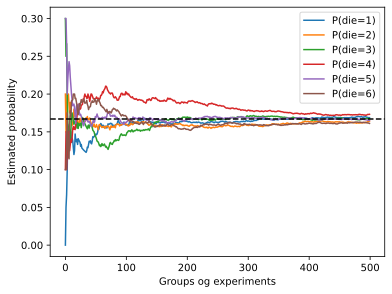

In [13]:
# 进行500组实验，每组抽取10个样本
# 随着实验次数增多，频率向理论概率收敛
counts = multinomial.Multinomial(10, fair_probs).sample((500, ))
cum_counts = counts.cumsum(dim=0) # 按行累积计算
estimates = cum_counts/cum_counts.sum(dim=1, keepdim=True) # 除以累积后，每行总和

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(), label=("P(die="+str(i+1)+")"))

d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')  # 黑色虚线，表示理论上的概率
d2l.plt.gca().set_xlabel('Groups og experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend()